In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

#### Load dataset

In [2]:
glass= pd.read_csv("C:\\Users\\hp\\Desktop\\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 1. EDA

In [5]:
glass.shape

(214, 10)

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Checking missing values

In [11]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### Treating outliers

<Axes: >

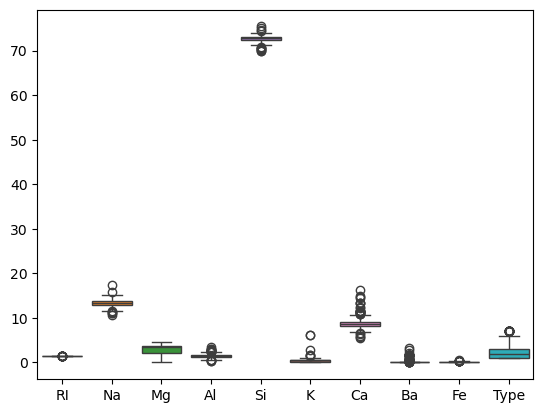

In [13]:
sns.boxplot(glass)

#### Replace outliers

In [15]:
Q1 = glass['RI'].quantile(0.25)
Q3 = glass['RI'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['RI'] = glass['RI'].clip(lower=lower_bound, upper=upper_bound)

In [17]:
Q1 = glass['Na'].quantile(0.25)
Q3 = glass['Na'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['Na'] = glass['Na'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
Q1 = glass['Al'].quantile(0.25)
Q3 = glass['Al'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['Al'] = glass['Al'].clip(lower=lower_bound, upper=upper_bound)

In [21]:
Q1 = glass['Si'].quantile(0.25)
Q3 = glass['Si'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['Si'] = glass['Si'].clip(lower=lower_bound, upper=upper_bound)

In [23]:
Q1 = glass['K'].quantile(0.25)
Q3 = glass['K'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['K'] = glass['K'].clip(lower=lower_bound, upper=upper_bound)

In [25]:
Q1 = glass['Ca'].quantile(0.25)
Q3 = glass['Ca'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['Ca'] = glass['Ca'].clip(lower=lower_bound, upper=upper_bound)

In [27]:
Q1 = glass['Fe'].quantile(0.25)
Q3 = glass['Fe'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
glass['Fe'] = glass['Fe'].clip(lower=lower_bound, upper=upper_bound)

In [29]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518165,13.405181,2.684533,1.420794,72.668949,0.440789,8.796741,0.175047,0.052850,2.780374
std,0.002374,0.742792,1.442408,0.424339,0.658469,0.306640,0.873799,0.497219,0.085568,2.103739
min,1.512570,11.531250,0.000000,0.530000,71.068750,0.000000,6.841250,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.523110,15.201250,4.490000,2.290000,74.298750,1.341250,10.571250,3.150000,0.250000,7.000000


<Axes: >

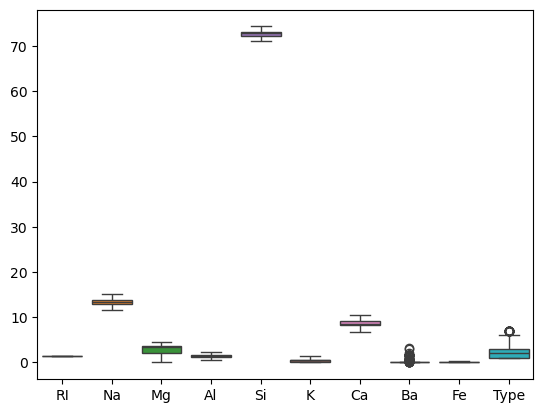

In [31]:
sns.boxplot(glass)

In [33]:
corr= glass.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.064047,-0.032721,-0.470391,-0.532124,-0.344942,0.760449,-0.070237,0.094617,-0.168685
Na,-0.064047,1.000000,-0.295178,0.208865,-0.164674,-0.493401,-0.102396,0.379839,-0.251377,0.523700
Mg,-0.032721,-0.295178,1.000000,-0.474507,-0.210539,0.326625,-0.371040,-0.492262,0.101841,-0.744993
Al,-0.470391,0.208865,-0.474507,1.000000,0.142701,0.183350,-0.281499,0.479850,-0.089357,0.605367
Si,-0.532124,-0.164674,-0.210539,0.142701,1.000000,-0.034263,-0.192171,-0.020404,-0.064187,0.180933
K,-0.344942,-0.493401,0.326625,0.183350,-0.034263,1.000000,-0.499029,-0.076090,0.078367,-0.244500
Ca,0.760449,-0.102396,-0.371040,-0.281499,-0.192171,-0.499029,1.000000,-0.140504,0.103456,0.045226
Ba,-0.070237,0.379839,-0.492262,0.479850,-0.020404,-0.076090,-0.140504,1.000000,-0.066956,0.575161
Fe,0.094617,-0.251377,0.101841,-0.089357,-0.064187,0.078367,0.103456,-0.066956,1.000000,-0.218973
Type,-0.168685,0.523700,-0.744993,0.605367,0.180933,-0.244500,0.045226,0.575161,-0.218973,1.000000


##### Checking the inconsistencies in glass data

In [35]:
glass.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

The data appears to be imbalanced, so I will use SMOTE to balance the dataset for further analysis.

### 2. Data visualization

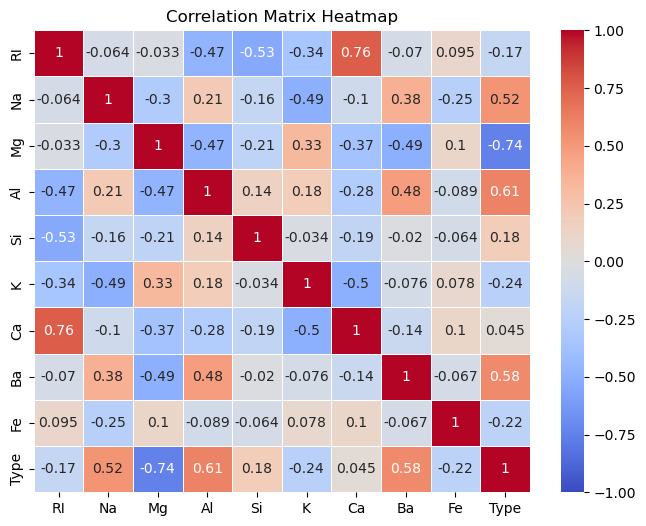

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

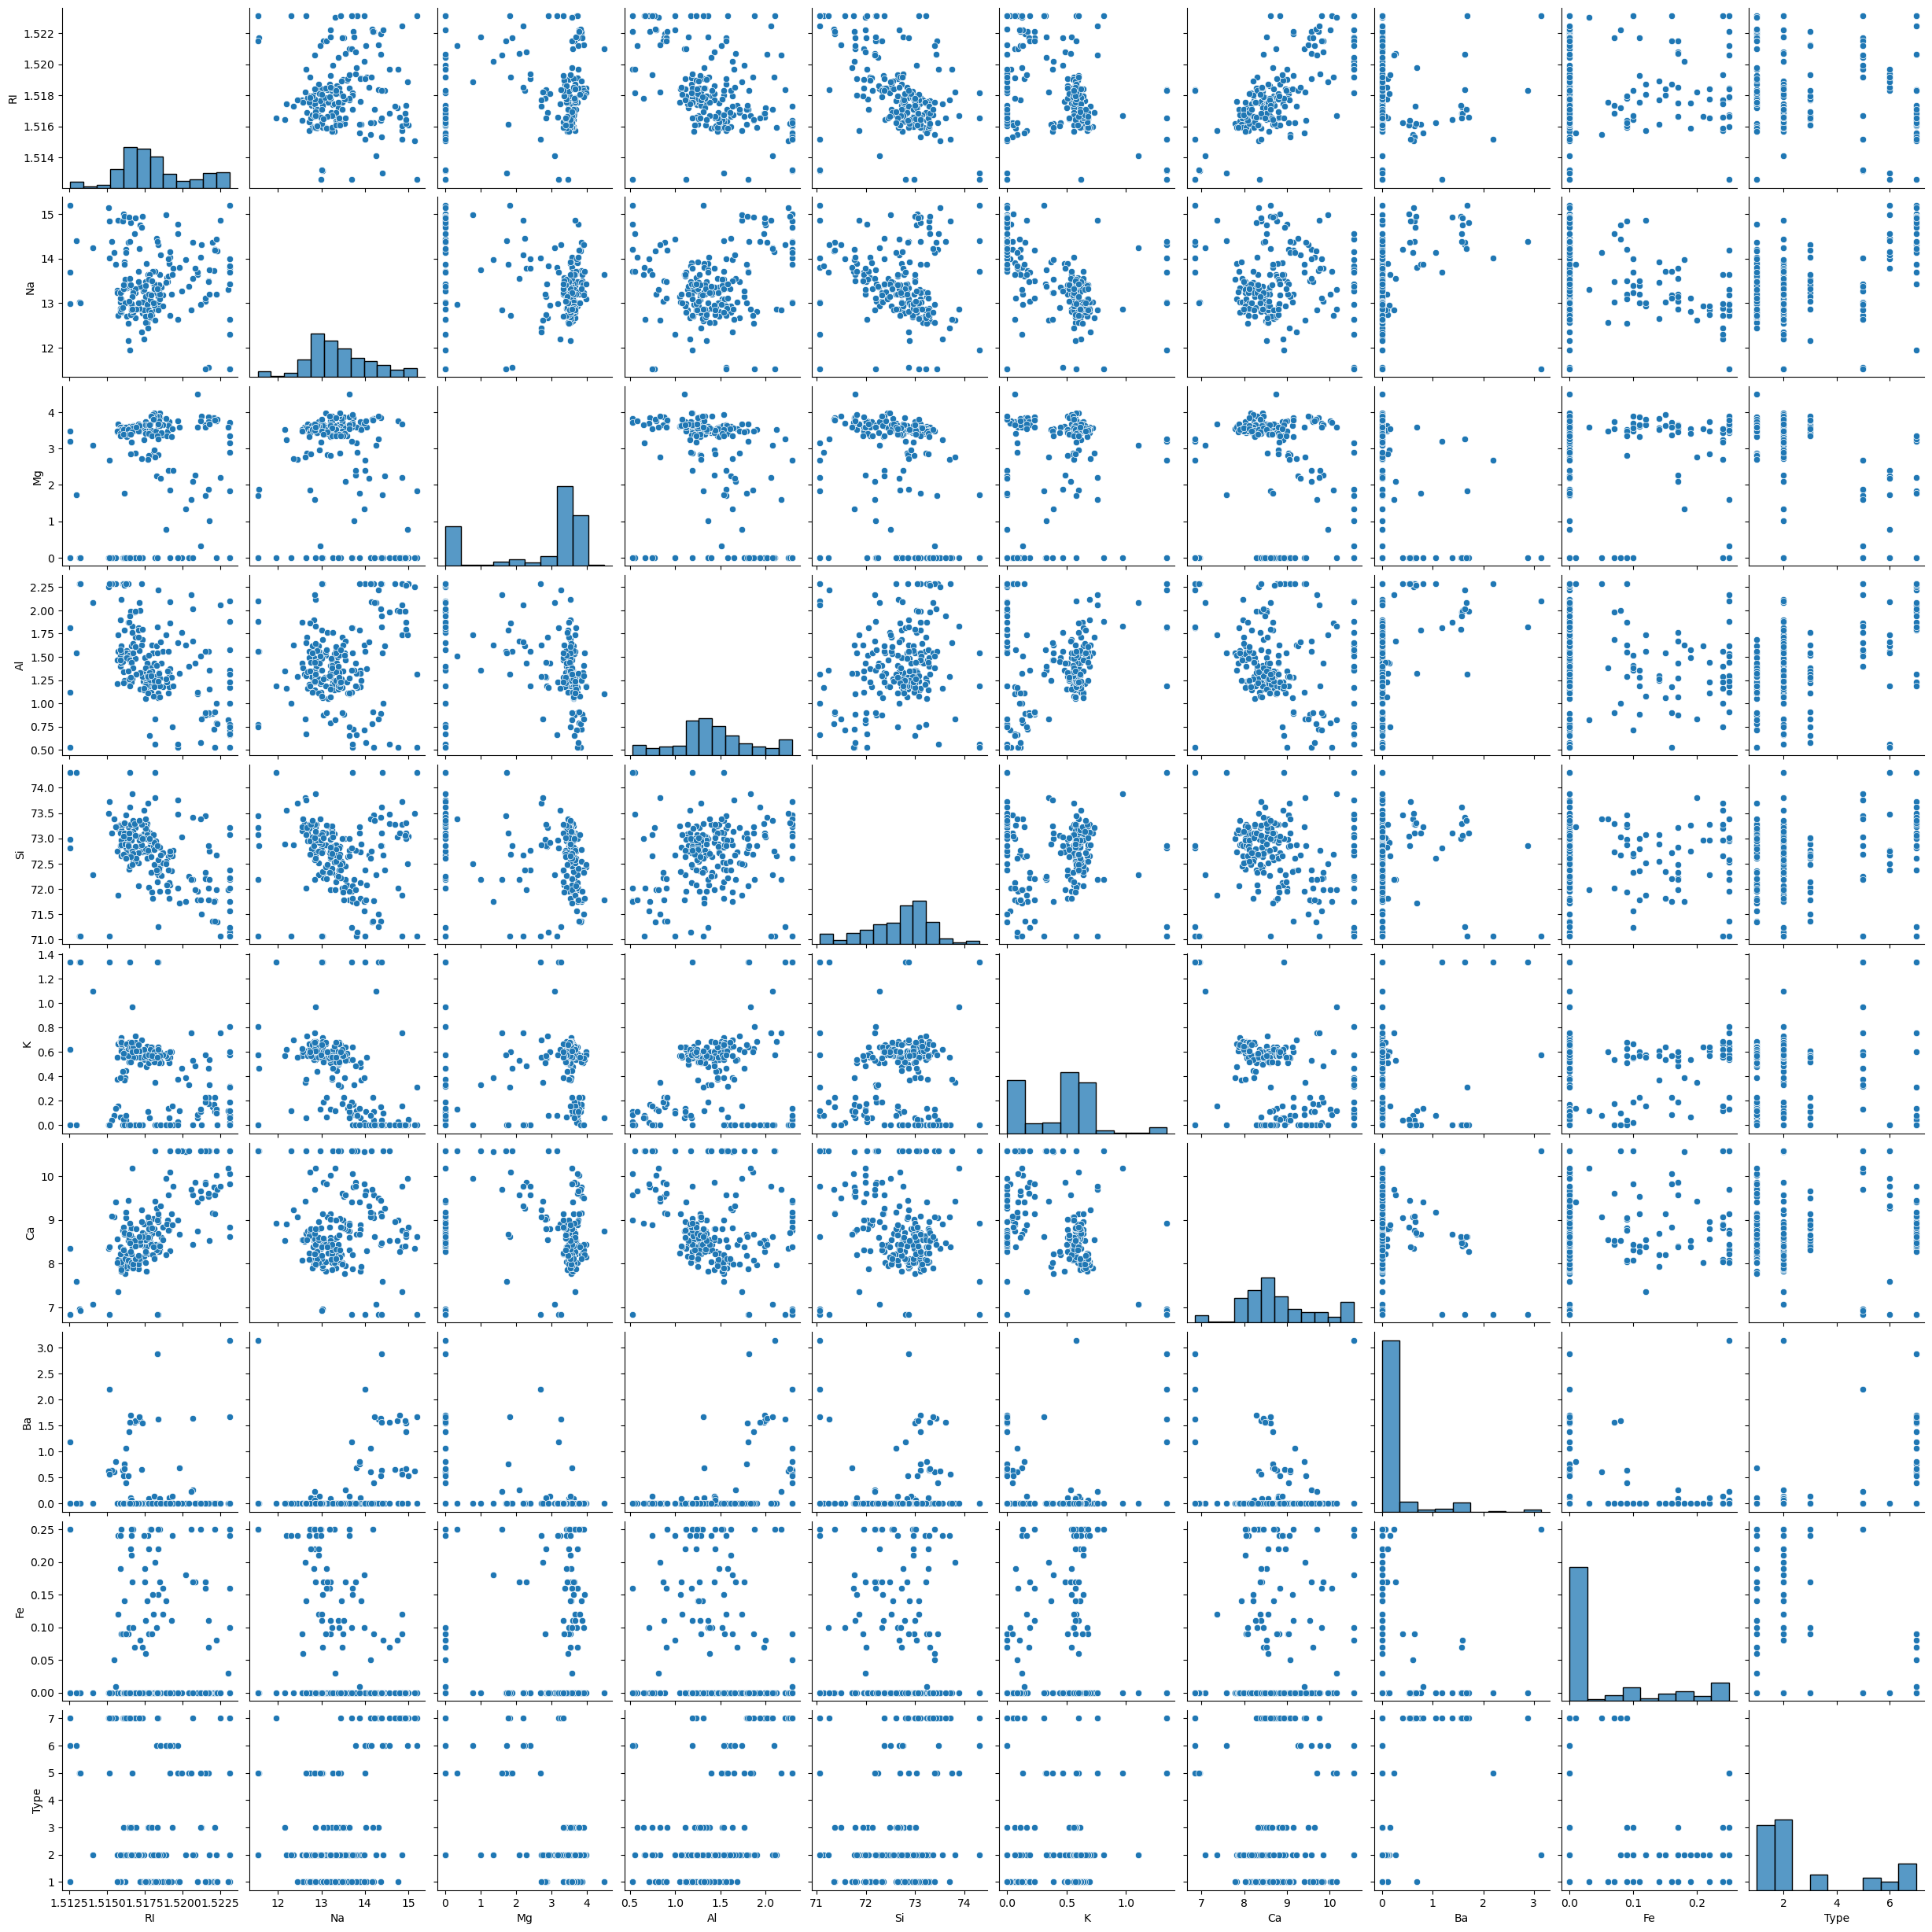

In [39]:
sns.pairplot(glass)

### 3. Data preprocessing

In [41]:
x=glass.iloc[:,0:9]
y=glass['Type']

In [43]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [45]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

##### Handling the imbalanced data

In [47]:
smote = SMOTE(random_state= 5)
# Fit and transform the training data
x1, y1 = smote.fit_resample(x, y)

In [49]:
y1.value_counts()

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

##### Standardization of data

In [51]:
def get_standardized(x):
    return (x-x.mean())/x.std()

In [53]:
stand_x= get_standardized(x1)
stand_x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.303695,0.064653,1.551143,-0.941782,-1.456233,-0.921225,-0.256530,-0.431406,-0.549418
1,-0.235143,0.372640,0.966333,-0.345939,0.019270,0.313586,-1.224068,-0.431406,-0.549418
2,-0.882360,-0.070862,0.933479,0.066567,0.423092,0.048984,-1.276652,-0.431406,-0.549418
3,-0.212513,-0.465086,1.025472,-0.506358,-0.167109,0.578189,-0.813916,-0.431406,-0.549418
4,-0.321137,-0.391169,0.979475,-0.620944,0.562877,0.519388,-0.971667,-0.431406,-0.549418
...,...,...,...,...,...,...,...,...,...
451,-0.785535,0.964044,-1.399188,1.785344,0.207812,-1.096971,0.477474,0.593219,-0.549418
452,-0.693702,0.923968,-1.399188,1.785344,0.199941,-0.945385,0.110371,1.310388,-0.549418
453,0.365197,0.874132,-1.399188,1.233144,1.045842,-1.097626,-0.490915,2.704738,-0.549418
454,-0.496429,1.448000,-1.399188,1.114841,0.505733,-1.097626,-0.555697,2.641092,0.241330


### 4. Random Forest model implementation

In [55]:
x_train, x_test,y_train,y_test = train_test_split(stand_x,y1, test_size=0.2,random_state= 7)

In [57]:
y_train.value_counts()

Type
2    63
1    62
6    62
3    61
5    60
7    56
Name: count, dtype: int64

In [59]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(364, 9) (364,) (92, 9) (92,)


In [61]:
model = RandomForestClassifier(n_estimators= 50, max_features= 3, min_samples_split= 5, max_depth= 10, criterion= 'entropy', random_state= 10)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       min_samples_split=5, n_estimators=50, random_state=10)

In [63]:
pred_train=model.predict(x_train)
pd.Series(pred_train).value_counts()

2    64
6    62
1    61
3    61
5    60
7    56
Name: count, dtype: int64

In [65]:
pred_test = model.predict(x_test) # predicting on test data set 
pd.Series(pred_test).value_counts()

7    18
5    16
3    16
6    15
1    14
2    13
Name: count, dtype: int64

In [67]:
print(classification_report(pred_train,y_train))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        61
           2       1.00      0.98      0.99        64
           3       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        56

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [69]:
print(classification_report(pred_test,y_test))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.85      0.85      0.85        13
           3       1.00      0.94      0.97        16
           5       0.94      0.94      0.94        16
           6       1.00      0.93      0.97        15
           7       0.85      0.94      0.89        18

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



### 5. Bagging and Boosting method

##### Bagging

In [71]:
cart= DecisionTreeClassifier()
model1 = BaggingClassifier(estimator= cart, n_estimators= 100, max_features= 3, random_state= 10)
model1.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=3,
                  n_estimators=100, random_state=10)

In [73]:
pred_train_B=model1.predict(x_train)
pd.Series(pred_train_B).value_counts()

2    63
1    62
6    62
3    61
5    60
7    56
Name: count, dtype: int64

In [75]:
pred_test_B = model1.predict(x_test) # predicting on test data set 
pd.Series(pred_test_B).value_counts()

7    18
5    17
3    15
6    15
1    14
2    13
Name: count, dtype: int64

In [77]:
print(classification_report(pred_train_B,y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        56

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [79]:
print(classification_report(pred_test_B,y_test))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.77      0.77      0.77        13
           3       0.80      0.80      0.80        15
           5       1.00      0.94      0.97        17
           6       1.00      0.93      0.97        15
           7       0.90      1.00      0.95        18

    accuracy                           0.88        92
   macro avg       0.88      0.87      0.87        92
weighted avg       0.88      0.88      0.88        92



##### Boosting

In [81]:
model2 = AdaBoostClassifier()
model2.fit(x_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [83]:
pred_train_Bo=model1.predict(x_train)
pd.Series(pred_train_Bo).value_counts()

2    63
1    62
6    62
3    61
5    60
7    56
Name: count, dtype: int64

In [85]:
pred_test_Bo = model1.predict(x_test) # predicting on test data set 
pd.Series(pred_test_Bo).value_counts()

7    18
5    17
3    15
6    15
1    14
2    13
Name: count, dtype: int64

In [87]:
print(classification_report(pred_train_Bo,y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        56

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [89]:
print(classification_report(pred_test_Bo,y_test))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.77      0.77      0.77        13
           3       0.80      0.80      0.80        15
           5       1.00      0.94      0.97        17
           6       1.00      0.93      0.97        15
           7       0.90      1.00      0.95        18

    accuracy                           0.88        92
   macro avg       0.88      0.87      0.87        92
weighted avg       0.88      0.88      0.88        92



Random Forest, AdaBoost, and Bagging achieve the same accuracy but differ in characteristics: Random Forest excels in robustness and feature importance, AdaBoost focuses on correcting errors of previous models and can be sensitive to noisy data, while Bagging reduces variance through multiple model averaging and is generally simpler. The choice depends on specific needs for robustness, handling of outliers, and interpretability.

#### Additional notes

##### 1. Explain Bagging and Boosting methods. How is it different from each other ?

Bagging (Bootstrap Aggregating) creates multiple models by training on different subsets of the data sampled with replacement, and combines their predictions to reduce variance and prevent overfitting. Boosting trains models sequentially, with each new model focusing on correcting errors made by the previous ones, aiming to reduce both bias and variance. While bagging uses parallel training and aggregates predictions independently, boosting uses a sequential approach and combines predictions with a weighted focus on model performance

##### 2. Explain how to handle imbalance in the data ?

To handle imbalanced data, you can use resampling techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class. Adjusting class weights or employing cost-sensitive learning can help the model focus more on the minority class. Ensemble methods like Balanced Random Forest can also be effective. Additionally, use evaluation metrics like Precision, Recall, and F1-score, or ROC-AUC to better assess model performance on imbalanced data.